In [1]:
import gymnasium as gym
from stable_baselines3.common.env_checker import check_env
import numpy as np
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_line
from envs.one_fish import one_fish
from envs.rescale_env import rescale_env

# RL envs work in transformed units
rl_env = one_fish()
env = rescale_env(rl_env)

check_env(rl_env)

def const_esc(obs, esc=0.5):
  harvest = np.max([obs[0] - esc, 0])
  effort = harvest / obs
  return(effort)

# consider an alternative initial state
env.rl_env.initial_pop = np.array([0.1], dtype=np.float32)


In [2]:
df = []
episode_reward = 0
observation, _ = env.reset()


for t in range(env.Tmax):
  action = const_esc(observation)
  df.append([t, action[0], episode_reward, observation[0]])
  observation, reward, terminated, done, info = env.step(action)
  episode_reward += reward
  if terminated:
    break


cols = ["t","action", "reward", "state"]
df = pd.DataFrame(df, columns = cols)

df["escapement"] = (df.state - df.action * df.state)


In [3]:
df

,t,action,reward,state,escapement
0,0,0.000000,0.000000,0.104726,0.104726
1,1,0.000000,0.000000,0.114618,0.114618
2,2,0.000000,0.000000,0.124552,0.124552
3,3,0.000000,0.000000,0.136048,0.136048
4,4,0.000000,0.000000,0.148668,0.148668
...,...,...,...,...,...
195,195,0.055078,4.221682,0.529144,0.500000
196,196,0.058614,4.250827,0.531132,0.500000
197,197,0.049404,4.281958,0.525986,0.500000
198,198,0.045223,4.307944,0.523683,0.500000


In [4]:

episode_reward


4.358259816421196

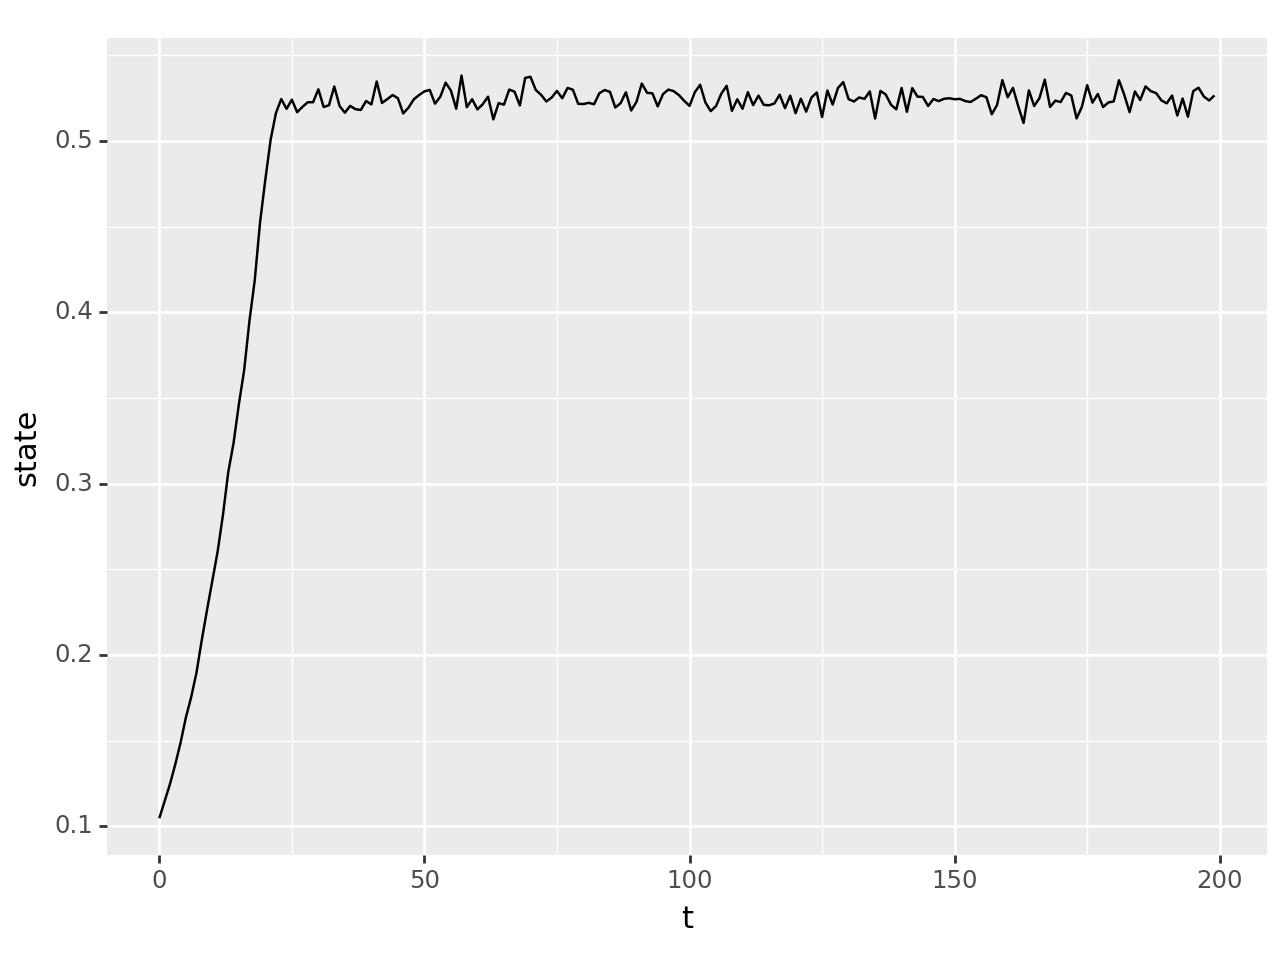

<Figure Size: (640 x 480)>

In [5]:

ggplot(df, aes("t", "state")) + geom_line()


